In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [4]:
diabetes = load_diabetes()
X,y = diabetes.data,diabetes.target
y_binary = (y> np.median(y)).astype(int)

X_train,X_test,y_train,y_test = train_test_split(X,y_binary, test_size =0.2, random_state =4)


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
model= LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 73.03%


In [12]:
print(confusion_matrix(y_test,y_pred))

[[30 13]
 [11 35]]


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71        43
           1       0.73      0.76      0.74        46

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



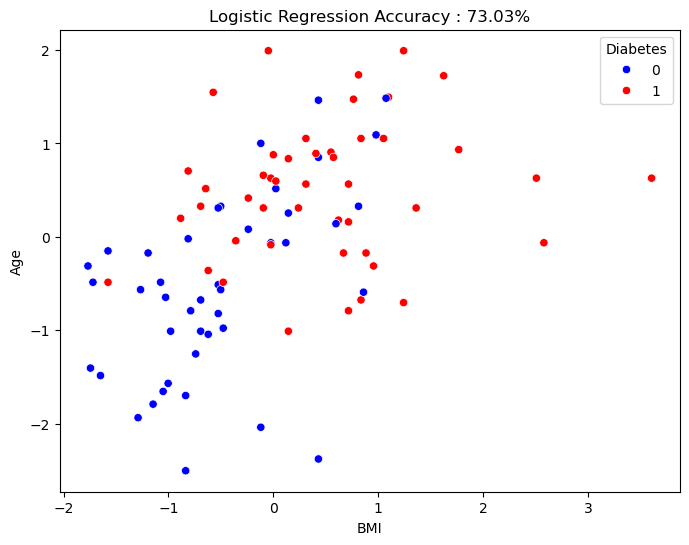

In [15]:
plt.figure(figsize =(8,6))
sns.scatterplot(x=X_test[:,2],y=X_test[:,8],hue=y_test, palette={0:'blue',1:'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Accuracy : {:.2f}%".format(accuracy * 100))
plt.legend(title='Diabetes', loc="upper right")